In [181]:
import pandas as pd
data_set = pd.read_csv('./data.csv')
data_set.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [182]:
data_set.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [183]:
print(data_set.isnull().any())
data_set.fillna(data_set.mean(), inplace=True)
data_set.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool


Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [102]:
data_set.agg({'Pulse':['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Pulse,Calories
min,80.000000,50.300000
max,159.000000,1860.400000
count,169.000000,169.000000
mean,107.461538,375.790244


In [103]:
data_set.loc[(data_set['Calories']>500)&(data_set['Calories']<1000)] 

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [104]:
data_set.loc[(data_set['Calories']>500)&(data_set['Pulse']<100)] 

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [105]:
df_modified = data_set.drop('Maxpulse', axis=1) 
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [106]:
data_set.drop('Maxpulse', axis=1, inplace=True)
data_set.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [107]:
print(data_set.dtypes)  
data_set['Calories'] = data_set['Calories'].astype(int)  
data_set.dtypes 

Duration      int64
Pulse         int64
Calories    float64
dtype: object


Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot: xlabel='Duration', ylabel='Calories'>

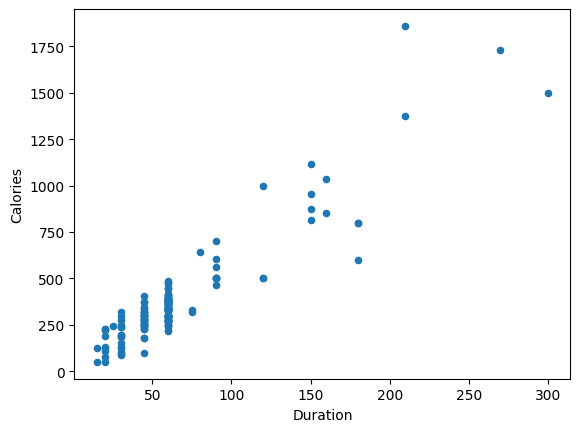

In [108]:
data_set.plot.scatter(x='Duration',y='Calories') 

## Titanic Dataset

In [138]:
# importing libraries all needed

import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577547

## Since above 0.5 and above value shows that those columns are highly correlated ( close to either positive or negative 1 means highly correlated). So we should NOT drop the column.

In [140]:
df.corr().style.background_gradient(cmap="Blues_r")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


<AxesSubplot: ylabel='Count'>

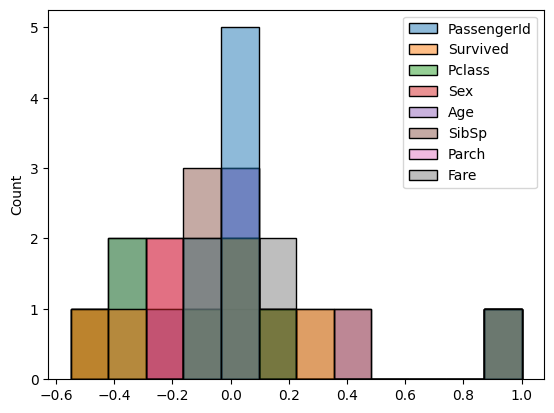

In [141]:
sns.histplot(data=df.corr())

In [168]:
train_raw = pd.read_csv('./train.csv')
test_raw = pd.read_csv('./test.csv')

train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [169]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [171]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [172]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline

In [173]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [174]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
print('Accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

Confusion Matrix
[[68 17]
 [18 40]]
Accuracy is 0.7552447552447552


## Glass Dataset

In [175]:
#question 2 starts # Reading file from glass csv data file from current directory
glass=pd.read_csv("./glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [178]:

X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_val)
# Summarizing of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
print('Accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

Confusion Matrix
[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
Accuracy is 0.8372093023255814


In [179]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
print('Accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.00      0.00      0.00        12
           3       0.24      1.00      0.39         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.56        43
   macro avg       0.21      0.32      0.23        43
weighted avg       0.48      0.56      0.48        43

Confusion Matrix
[[18  0  1  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  4  0  0  0]]
Accuracy is 0.5581395348837209


In [161]:
glass.corr().style.background_gradient(cmap="Blues_r")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


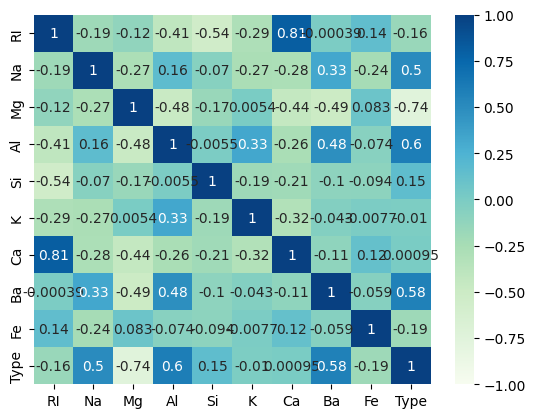

In [163]:
sns.heatmap(glass.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='GnBu')
plt.show()

### Which algorithm you got better accuracy? Can you justify why?

### For the Above Glass dataset, Naive Bayes model performed better (83% Accuracy) than SVM Model (55% Accuracy). Naive Bayes performs well on datasets where the features are independent of each other. Where as linear svm only works well when data is linearly seperable which might not be the case for this Glass dataset. It is possible that if we have used Non linear SVM with proper kernal, we might get better accuracy.